In [371]:
import numpy as np
import geopandas as gpd
from geopandas.tools import sjoin
from matplotlib import pyplot as plt
import pandas as pd
from shapely.geometry import Point
import os

In [263]:

dept_of_interest = "Dept_37-00027"
dept_folder = str("/Users/apple/Downloads/data-science-for-good/" + dept_of_interest + "/")


In [264]:
os.listdir(dept_folder)

['.DS_Store',
 '37-00027_ACS_data',
 '37-00027_UOF-P_2014-2016_prepped.csv',
 '37-00027_Shapefiles']

In [265]:
k,census_data_folder,police_csv,police_shp_folder = os.listdir(dept_folder)

In [266]:
for file in os.listdir(dept_folder+police_shp_folder):
    print(file)
    if ".shp" in file:
        shp_file = file

APD_DIST.dbf
APD_DIST.shx
APD_DIST.sbx
APD_DIST.shp
APD_DIST.sbn


In [267]:
police_shp_gdf = gpd.read_file(dept_folder+police_shp_folder+'/'+shp_file)

# Use Pandas to read the "prepped" CSV, dropping the first row, which is just more headers
police_arrest_df = pd.read_csv(dept_folder+police_csv).iloc[1:].reset_index(drop=True)

In [268]:
police_shp_gdf.head()

,NAME,SORTORDER,BATID,JURIID,COLOR,CODE,EXTERNALKE,BATTALIONC,DISTRICT,SECTOR,INPUT_DATE,MODIFIED_D,INPUT_BY,MODIFIED_B,BUREAU,PATROL_ARE,AREACOMMAN,SHAPE_AREA,SHAPE_LEN,geometry
0,CHARLIE 4,1.0,400.0,11.0,16744576.0,1282,1282,CHAR,CHARLIE 4,CHARLIE,2014-12-22,None,bmartinlimuel,None,CENTRAL,CENTRALEAST,512-974-5900,6.657440e+08,387953.791071,"POLYGON ((3160030.801874995 10110945.26125, 31..."
1,GEORGE 1,1.0,194.0,15.0,16744576.0,1298,1298,G1,GEORGE 1,GEORGE,2014-12-22,None,bmartinlimuel,None,NORTH,DTAC,512-974-5203,2.790690e+07,23590.887752,"POLYGON ((3117569.753749996 10072205.20874999,..."
2,GEORGE 2,1.0,194.0,15.0,16776960.0,1297,1297,G1,GEORGE 2,GEORGE,2014-12-22,None,bmartinlimuel,None,NORTH,DTAC,512-974-5203,9.667245e+06,19773.819675,"POLYGON ((3117394.076875001 10072195.676875, 3..."
3,IDA 1,1.0,215.0,60.0,16744576.0,1307,1307,I1,IDA 1,IDA,2014-12-22,None,bmartinlimuel,None,CENTRAL,NORTHCENTRAL,512-974-5203,1.054603e+08,48972.544807,"POLYGON ((3138058.366874993 10093095.421875, 3..."
4,IDA 2,1.0,215.0,60.0,16711680.0,1304,1304,I1,IDA 2,IDA,2014-12-22,None,bmartinlimuel,None,CENTRAL,NORTHCENTRAL,512-974-5203,6.245594e+07,38742.443899,"POLYGON ((3132516.318124995 10096385.60124999,..."


In [269]:
police_arrest_gdf.head()

,RIN,PRIMARY_KEY,INCIDENT_DATE,LOCATION_DISTRICT,INCIDENT_REASON,REASON_FOR_FORCE,SUBJECT_ID,SUBJECT_GENDER,SUBJECT_RACE,SUBJECT_ROLE,...,OFFICER_YEARS_ON_FORCE,Y_COORDINATE,Y_COORDINATE.1,LOCATION_DISTRICT.1,LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,LOCATION_CITY,LOCATION_STATE,LOCATION_LATITUDE,LOCATION_LONGITUDE,geometry
0,143002,2014170002,1/17/2014,GE,OTHER,NECESSARY TO EFFECT ARREST / DETENTION,5041390: 2014170002,M,Hispanic,ARRESTED,...,4,3115601,10070275,NaN,417 E 6TH ST,Austin,TX,30.266900,-97.738652,POINT (-97.738652 30.2669)
1,149691,20141981994,7/18/2014,FR,DISPATCHED CALL,NECESSARY TO EFFECT ARREST / DETENTION,302385019: 20141981994,M,Hispanic,ARRESTED,...,8,3115061,10044935,NaN,5000 TABLE TOP TRL,Austin,TX,30.196930,-97.742096,POINT (-97.742096 30.19693)
2,153115,20143060391,11/2/2014,GE,VIEWED OFFENSE,"IN CUSTODY, MAINTAINING CONTROL",459210821: 20143060391,M,Hispanic,ARRESTED,...,10,3115155,10070604,NaN,300 E 6TH ST,Austin,TX,30.267346,-97.740288,POINT (-97.74028800000001 30.267346)
3,149599,20141931963,7/12/2014,CH,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,10627710: 20141931963,F,Black,VICTIM/ARRE,...,2,3137140,10085508,NaN,6409 SPRINGDALE RD,Austin,TX,30.307201,-97.669664,POINT (-97.669664 30.307201)
4,152713,20142921903,10/20/2014,AD,DISPATCHED CALL,NECESSARY TO EFFECT ARREST / DETENTION,459015691: 20142921903,M,White,ARRESTED,...,6,3129179,10123478,NaN,12430 METRIC BLVD,Austin,TX,30.411555,-97.692050,POINT (-97.69204999999999 30.411555)


In [423]:
police_arrest_gdf['SUBJECT_ROLE'].value_counts()

ARRESTED       1513
JUV-ARRESTE     137
COMMITTED       117
SUBJECT         110
VICTIM/ARRE      81
SUSPECT          74
INVOLVED         31
JUV-COMMITT      21
VICTIM/OFFE      19
VICTIM           16
JUV-SUBJECT      13
OBSERV/SEEN       9
JUV-INVOLVE       5
SUMMONS/CIT       3
REC-RUN-MP        2
JUV-OBSERV/       2
WITNESS           2
REC-RUN/MP        1
JUV-PASSENG       1
JUV-VIC/ARR       1
COMPLAINANT       1
PASSENGER         1
Name: SUBJECT_ROLE, dtype: int64

In [270]:
police_arrest_gdf['INCIDENT_REASON'].value_counts()

DISPATCHED CALL       1513
VIEWED OFFENSE         333
OTHER                  138
TRAFFIC STOP            99
TACTICAL OPERATION      48
WARRANT SERVICE         29
Name: INCIDENT_REASON, dtype: int64

In [271]:
latlon_exists_index = police_arrest_df[['LOCATION_LATITUDE','LOCATION_LONGITUDE']].dropna().index

# Only use subset of data with existing Lat and Lon, to avoid Geocoding addresses or
# "guessing" at the meaning of Y_COORDINATE and Y_COORDINATE.1
police_arrest_df = police_arrest_df.iloc[latlon_exists_index].reset_index(drop=True)
police_arrest_df['LOCATION_LATITUDE'] = (police_arrest_df['LOCATION_LATITUDE']
                                         .astype('float'))
police_arrest_df['LOCATION_LONGITUDE'] = (police_arrest_df['LOCATION_LONGITUDE']
                                         .astype('float'))

In [272]:
# important to check if order in Shapefile is Point(Longitude,Latitude)
police_arrest_df['geometry'] = (police_arrest_df
                                .apply(lambda x: Point(x['LOCATION_LONGITUDE'],
                                                       x['LOCATION_LATITUDE']), 
                                       axis=1))
police_arrest_gdf = gpd.GeoDataFrame(police_arrest_df, geometry='geometry')
police_arrest_gdf.crs = {'init' :'epsg:4326'}

In [273]:
police_shp_gdf.crs = {'init' :'esri:102739'}
police_shp_gdf = police_shp_gdf.to_crs(epsg='4326')

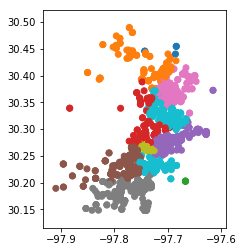

In [274]:

police_arrest_gdf.plot(column='LOCATION_DISTRICT')

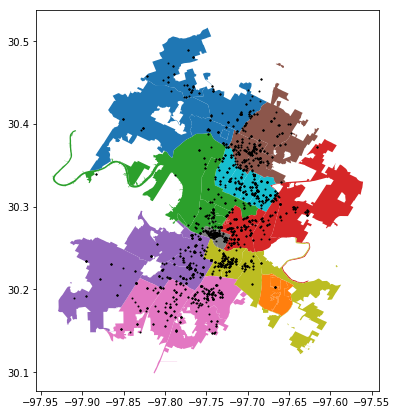

In [275]:
fig1,ax1 = plt.subplots()
police_shp_gdf.plot(ax=ax1,column='SECTOR')
police_arrest_gdf.plot(ax=ax1,marker='.',color='k',markersize=4)
fig1.set_size_inches(7,7)


In [276]:
for folder in os.listdir(dept_folder+census_data_folder):
    if 'poverty' in folder:
        poverty_folder = folder

In [277]:
 poverty_acs_file_ann,poverty_acs_file_meta = os.listdir(dept_folder+
                                                   census_data_folder+'/'+
                                                   poverty_folder)


In [278]:
# Same idea as above, use pandas for CSV's and geopandas for Shapefiles
census_poverty_df = pd.read_csv(dept_folder+
                             census_data_folder+'/'+
                             poverty_folder+'/'+
                             poverty_acs_file_ann)

census_poverty_df = census_poverty_df.iloc[1:].reset_index(drop=True)
print(dept_folder+
                             census_data_folder+'/'+
                             poverty_folder+'/'+
                             poverty_acs_file_ann)

/Users/apple/Downloads/data-science-for-good/Dept_37-00027/37-00027_ACS_data/37-00027_ACS_poverty/ACS_16_5YR_S1701_with_ann.csv


In [279]:
census_poverty_df.columns

Index(['GEO.id', 'GEO.id2', 'GEO.display-label', 'HC01_EST_VC01',
       'HC01_MOE_VC01', 'HC02_EST_VC01', 'HC02_MOE_VC01', 'HC03_EST_VC01',
       'HC03_MOE_VC01', 'HC01_EST_VC03',
       ...
       'HC02_EST_VC78', 'HC02_MOE_VC78', 'HC03_EST_VC78', 'HC03_MOE_VC78',
       'HC01_EST_VC79', 'HC01_MOE_VC79', 'HC02_EST_VC79', 'HC02_MOE_VC79',
       'HC03_EST_VC79', 'HC03_MOE_VC79'],
      dtype='object', length=369)

In [280]:
#census_poverty_df=census_poverty_df.rename(columns={'GEO.id':'GEOID'})

In [281]:

# Rename Census Tract ID column in ACS Poverty CSV to align with Census Tract Shapefile
census_poverty_df = census_poverty_df.rename(columns={'GEO.id2':'GEOID'})

census_tracts_gdf = gpd.read_file("/Users/apple/Downloads/cb_2017_48_tract_500k/"+
                                  "cb_2017_48_tract_500k.shp")



In [282]:
census_poverty_df.head()

,GEO.id,GEOID,GEO.display-label,HC01_EST_VC01,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,HC03_MOE_VC01,HC01_EST_VC03,...,HC02_EST_VC78,HC02_MOE_VC78,HC03_EST_VC78,HC03_MOE_VC78,HC01_EST_VC79,HC01_MOE_VC79,HC02_EST_VC79,HC02_MOE_VC79,HC03_EST_VC79,HC03_MOE_VC79
0,1400000US48453000101,48453000101,"Census Tract 1.01, Travis County, Texas",4270,276,270,104,6.3,2.4,821,...,127,66,30.6,16.4,420,99,117,65,27.9,14.2
1,1400000US48453000102,48453000102,"Census Tract 1.02, Travis County, Texas",2570,171,81,74,3.2,2.9,571,...,4,5,2.5,3.2,255,72,43,32,16.9,11.4
2,1400000US48453000203,48453000203,"Census Tract 2.03, Travis County, Texas",1258,174,423,142,33.6,9.1,49,...,169,73,49.9,13.2,207,96,160,90,77.3,15.7
3,1400000US48453000204,48453000204,"Census Tract 2.04, Travis County, Texas",3042,199,589,171,19.4,5.7,426,...,341,137,55.8,14.7,244,91,168,80,68.9,17.5
4,1400000US48453000205,48453000205,"Census Tract 2.05, Travis County, Texas",4227,425,547,325,12.9,6.7,478,...,302,221,41.4,21.6,311,163,205,141,65.9,28.9


In [434]:
len(census_poverty_df['GEO.id'])

218

In [283]:
census_tracts_gdf.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,48,001,950902,1400000US48001950902,48001950902,9509.02,CT,441365958,4947660,"POLYGON ((-95.705011 31.840815, -95.7056039999..."
1,48,005,000200,1400000US48005000200,48005000200,2,CT,125709530,4356605,"POLYGON ((-94.73299299999999 31.385078, -94.73..."
2,48,005,000700,1400000US48005000700,48005000700,7,CT,2876878,0,"POLYGON ((-94.73496999999999 31.327901, -94.73..."
3,48,005,001200,1400000US48005001200,48005001200,12,CT,399114984,98858732,"POLYGON ((-94.52616999999999 31.212772, -94.50..."
4,48,009,020200,1400000US48009020200,48009020200,202,CT,1318291865,40681909,"POLYGON ((-98.95382499999999 33.49637, -98.953..."


In [284]:
# Merge Census Tract GeoDataFrame (from Shapefile) with ACS Poverty DataFrame
# using the 'GEOID', or Census Tract 11-digit numerical ID.
census_merged_gdf = census_tracts_gdf.merge(census_poverty_df, on = 'GEOID')

# Make sure everything is using EPSG:4326
census_merged_gdf = census_merged_gdf.to_crs(epsg='4326')

In [416]:
police_arrest_gdf['REASON_FOR_FORCE'].value_counts()

NECESSARY TO EFFECT ARREST / DETENTION    1400
IN CUSTODY, MAINTAINING CONTROL            393
TO RESTRAIN FOR SUBJECTS SAFETY            138
NECESSARY TO DEFEND ANOTHER                 98
NECESSARY TO DEFEND REPORTING OFFICER       91
OTHER (DOCUMENT IN SUPPLEMENT)              37
TO PREVENT A VIOLENT FELONY                  3
Name: REASON_FOR_FORCE, dtype: int64

In [422]:
police_arrest_gdf['INCIDENT_REASON''REASON_FOR_FORCE']

KeyError: 'REASON_FOR_FORCE'

In [418]:
police_arrest_gdf['INCIDENT_REASON'].value_counts()

DISPATCHED CALL       1513
VIEWED OFFENSE         333
OTHER                  138
TRAFFIC STOP            99
TACTICAL OPERATION      48
WARRANT SERVICE         29
Name: INCIDENT_REASON, dtype: int64

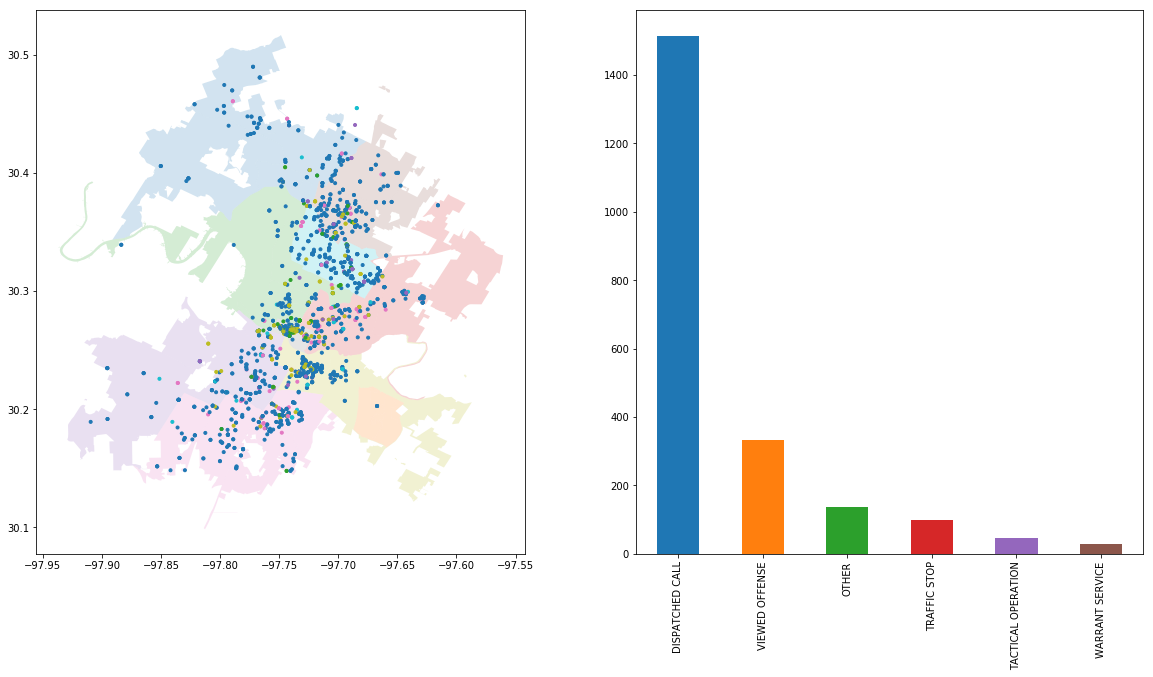

In [285]:
fig1,ax = plt.subplots(1,2,figsize=(20,10))
#fig1.subplots_adjust()
#ax1=plt.subplot(121)
#ax2=plt.subplot(122)
police_shp_gdf.plot(ax=ax[0],column='SECTOR',alpha=0.2)
s=police_arrest_gdf['INCIDENT_REASON']
s.value_counts().plot(kind='bar',ax=ax[1])
police_arrest_gdf.plot(marker='.',column="INCIDENT_REASON",ax=ax[0])



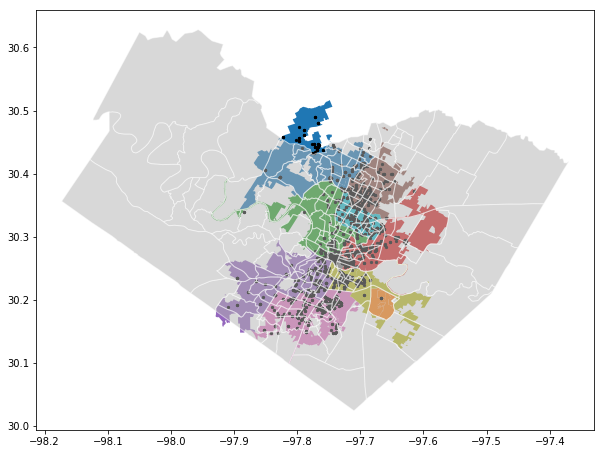

In [286]:
fig2,ax2 = plt.subplots()
police_shp_gdf.plot(ax=ax2,column='SECTOR')
police_arrest_gdf.plot(ax=ax2,marker='.',color='k',markersize=20)
census_merged_gdf.plot(ax=ax2,color='0.7',alpha=.5,edgecolor='white')
fig2.set_size_inches(10,10)

# DataSet 2 

In [287]:

dept_of_interest2 = "Dept_37-00049"
dept_folder2 = str("/Users/apple/Downloads/data-science-for-good/" + dept_of_interest2 + "/")



In [288]:
os.listdir(dept_folder2)

['37-00049_Shapefiles',
 '.DS_Store',
 '37-00049_ACS_data',
 '37-00049_UOF-P_2016_prepped.csv']

In [289]:
police_shp_folder2,k,census_data_folder2,police_csv2 = os.listdir(dept_folder2)

In [290]:
for file in os.listdir(dept_folder2+police_shp_folder2):
    if ".shp" in file:
        if ".xml" in file:
            continue
        else:
            shp_file2 = file

In [291]:
police_shp_gdf2 = gpd.read_file(dept_folder2+police_shp_folder2+'/'+shp_file2)

# Use Pandas to read the "prepped" CSV, dropping the first row, which is just more headers
police_arrest_df2 = pd.read_csv(dept_folder2+police_csv2).iloc[1:].reset_index(drop=True)
print(dept_folder2+police_shp_folder2+'/'+shp_file2)

/Users/apple/Downloads/data-science-for-good/Dept_37-00049/37-00049_Shapefiles/EPIC.shp


In [292]:
police_shp_gdf2.head()

,Name,Shape_STAr,Shape_STLe,geometry
0,EPIC_Fair Park,9.312213e+07,70821.503172,"POLYGON ((2510120.998828113 6975276.747940272,..."
1,EPIC_CampWisdomCorridor,1.139695e+08,57536.951272,"POLYGON ((2472098.504007116 6931264.971462682,..."
2,EPIC West Dallas,1.258257e+08,45373.481738,"POLYGON ((2477263.138690948 6964841.607721359,..."
3,EPIC Vickery Meadow,5.226778e+07,30305.941933,"POLYGON ((2503591.259262949 7008808.840324774,..."
4,EPIC_Lancaster Corridor,7.831274e+07,39182.926747,"POLYGON ((2498968.657615781 6946676.269380182,..."


In [373]:
police_shp_gdf2 = gpd.GeoDataFrame(police_shp_gdf2, geometry='geometry')
police_shp_gdf2.crs = {'init' :'epsg:4326'}

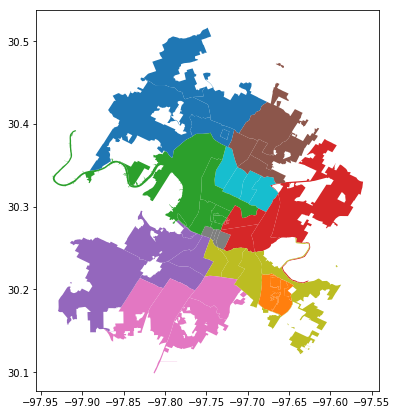

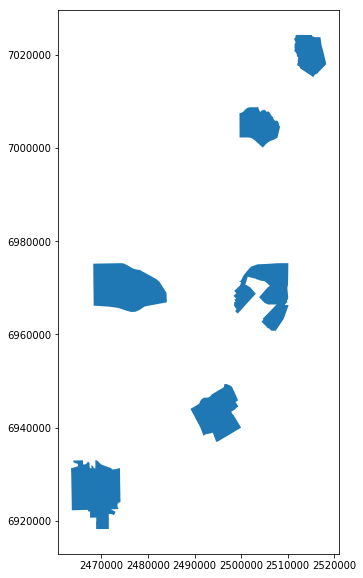

In [384]:
fig1,ax1 = plt.subplots()
police_shp_gdf.plot(ax=ax1,column='SECTOR')
# police_arrest_gdf.plot(ax=ax1,marker='.',color='k',markersize=4)
fig1.set_size_inches(7,7)
police_shp_gdf2.plot(figsize=(20,10))

In [293]:
police_arrest_df2.head()

,INCIDENT_DATE,INCIDENT_TIME,UOF_NUMBER,OFFICER_ID,OFFICER_GENDER,OFFICER_RACE,OFFICER_HIRE_DATE,OFFICER_YEARS_ON_FORCE,OFFICER_INJURY,OFFICER_INJURY_TYPE,...,TYPE_OF_FORCE_USED3,TYPE_OF_FORCE_USED4,TYPE_OF_FORCE_USED5,TYPE_OF_FORCE_USED6,TYPE_OF_FORCE_USED7,TYPE_OF_FORCE_USED8,TYPE_OF_FORCE_USED9,TYPE_OF_FORCE_USED10,NUMBER_EC_CYCLES,FORCE_EFFECTIVE
0,9/3/16,4:14:00 AM,37702,10810,Male,Black,5/7/14,2,No,No injuries noted or visible,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,3/22/16,11:00:00 PM,33413,7706,Male,White,1/8/99,17,Yes,Sprain/Strain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
2,5/22/16,1:29:00 PM,34567,11014,Male,Black,5/20/15,1,No,No injuries noted or visible,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
3,1/10/16,8:55:00 PM,31460,6692,Male,Black,7/29/91,24,No,No injuries noted or visible,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
4,11/8/16,2:30:00 AM,"37879, 37898",9844,Male,White,10/4/09,7,No,No injuries noted or visible,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"No, Yes"


In [411]:
RACE_DUMMY=pd.get_dummies(police_arrest_df2['OFFICER_RACE'])
SEX_DUMMY=pd.get_dummies(police_arrest_df2['OFFICER_GENDER'])
police_arrest_df2=pd.concat([police_arrest_df2,RACE_DUMMY],axis=1)
police_arrest_df2=pd.concat([police_arrest_df2,SEX_DUMMY],axis=1)

In [412]:
police_arrest_df2.head()

,INCIDENT_DATE,INCIDENT_TIME,UOF_NUMBER,OFFICER_ID,OFFICER_GENDER,OFFICER_RACE,OFFICER_HIRE_DATE,OFFICER_YEARS_ON_FORCE,OFFICER_INJURY,OFFICER_INJURY_TYPE,...,Other,White,American Ind,Asian,Black,Hispanic,Other,White,Female,Male
0,9/3/16,4:14:00 AM,37702,10810,Male,Black,5/7/14,2,No,No injuries noted or visible,...,0,0,0,0,1,0,0,0,0,1
1,3/22/16,11:00:00 PM,33413,7706,Male,White,1/8/99,17,Yes,Sprain/Strain,...,0,1,0,0,0,0,0,1,0,1
2,5/22/16,1:29:00 PM,34567,11014,Male,Black,5/20/15,1,No,No injuries noted or visible,...,0,0,0,0,1,0,0,0,0,1
3,1/10/16,8:55:00 PM,31460,6692,Male,Black,7/29/91,24,No,No injuries noted or visible,...,0,0,0,0,1,0,0,0,0,1
4,11/8/16,2:30:00 AM,"37879, 37898",9844,Male,White,10/4/09,7,No,No injuries noted or visible,...,0,1,0,0,0,0,0,1,0,1


In [435]:
police_arrest_df2["UOF_NUMBER"].value_counts()

36520                                 4
 32392, 32683, 33083                  3
36540                                 3
 33984, 33985                         3
 34561, 34562, 34563, 34564           2
 37561, 37562                         2
 37176, 37177                         2
 37559, 37560                         2
 33231, 33232                         2
37529                                 2
36191                                 2
36397                                 2
36674                                 2
 34996, 34997                         2
 31735, 31736, 31737                  2
 37178, 37179                         2
37528                                 2
 37803, 37804                         2
34925                                 2
31637                                 2
 34329, 34330                         2
 36394, 36395                         2
34140                                 2
 37801, 37802                         2
 36396, 36853, 36854, 36855, 36856    2


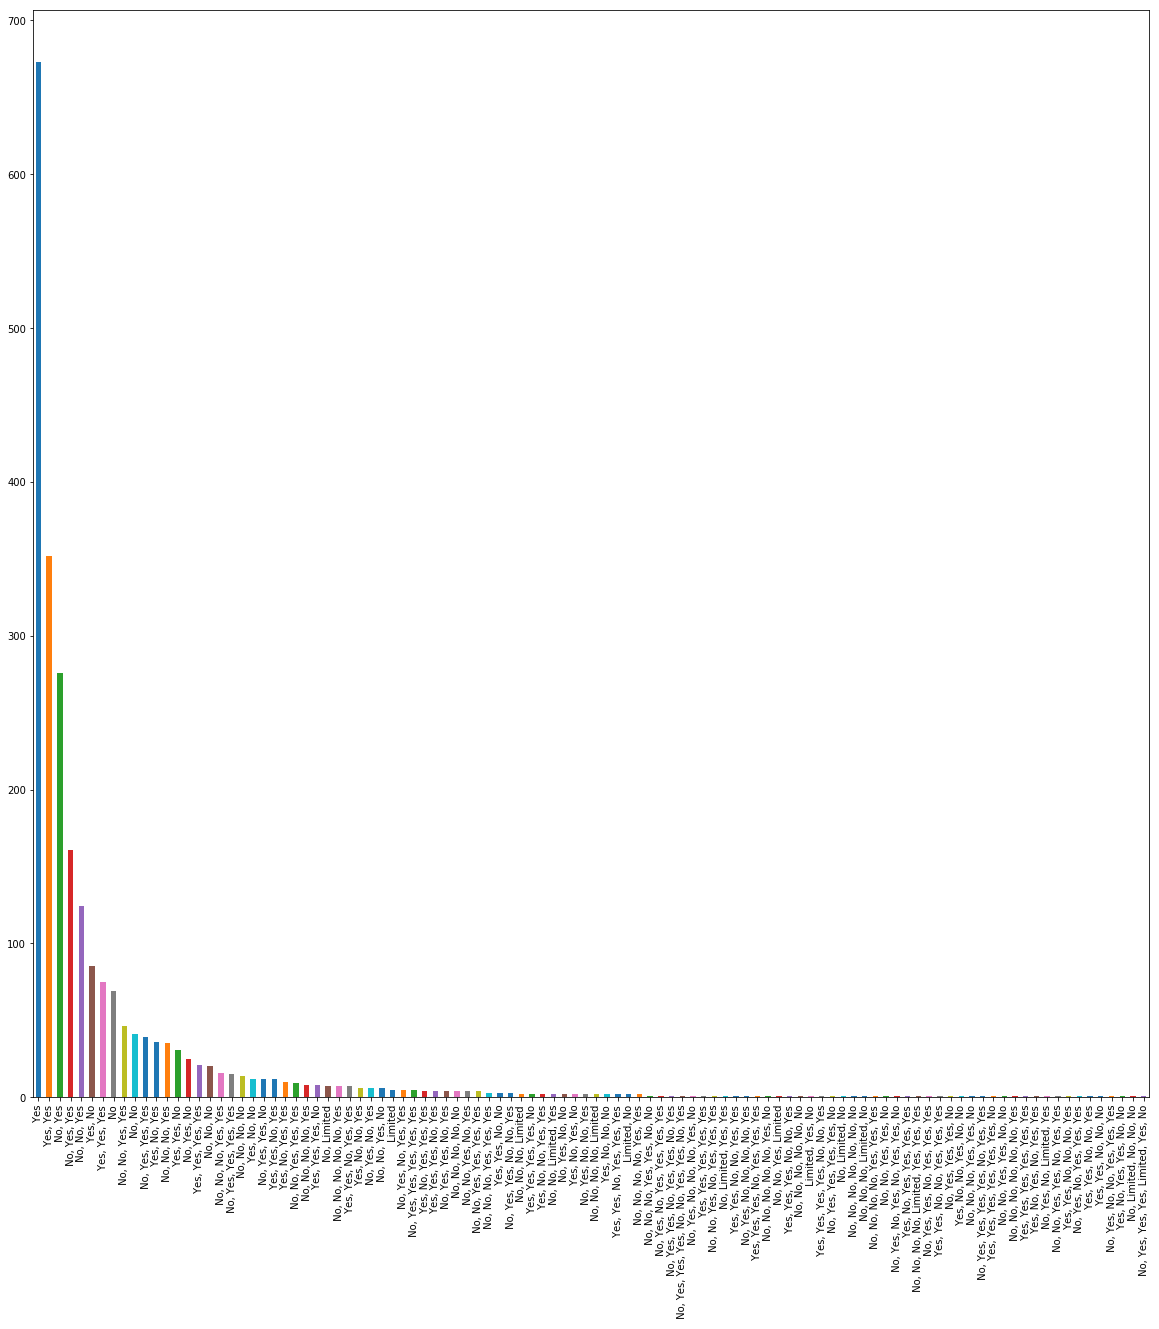

In [317]:
police_arrest_df2["FORCE_EFFECTIVE"].value_counts().plot('bar',figsize=(20,20))

In [424]:
police_arrest_df2["FORCE_EFFECTIVE"].value_counts()

 Yes                                       673
 Yes, Yes                                  352
 No, Yes                                   276
 No, Yes, Yes                              161
 No, No, Yes                               124
 Yes, No                                    85
 Yes, Yes, Yes                              75
 No                                         69
 No, No, Yes, Yes                           46
 No, No                                     41
 No, Yes, Yes, Yes                          39
 Yes, No, Yes                               36
 No, No, No, Yes                            35
 Yes, Yes, No                               31
 No, Yes, No                                25
 Yes, Yes, Yes, Yes                         21
 No, No, No                                 20
 No, No, No, Yes, Yes                       16
 No, Yes, Yes, Yes, Yes                     15
 No, No, No, No                             14
 Yes, No, No                                12
 No, Yes, Yes

In [339]:
census_poverty_df2=pd.read_csv('/Users/apple/Downloads/data-science-for-good/Dept_49-00009/49-00009_ACS_data/49-00009_ACS_race-sex-age/ACS_15_5YR_DP05_with_ann.csv')
census_poverty_df2=census_tracts_gdf2.iloc[1:].reset_index(drop=True)

In [340]:
census_poverty_df2 = census_poverty_df.rename(columns={'GEO.id2':'GEOID'})

In [341]:
# Merge Census Tract GeoDataFrame (from Shapefile) with ACS Poverty DataFrame
# using the 'GEOID', or Census Tract 11-digit numerical ID.
census_merged_gdf2 = census_tracts_gdf.merge(census_poverty_df2, on = 'GEOID')

# Make sure everything is using EPSG:4326
census_merged_gdf2 = census_merged_gdf2.to_crs(epsg='4326')


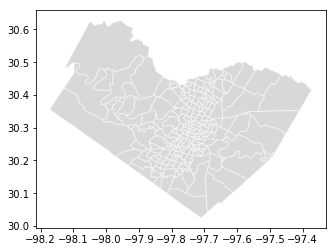

In [344]:
census_merged_gdf2.plot(color='0.7',alpha=.5,edgecolor='white')

# DataSet3

In [350]:

dept_of_interest3 = "Dept_49-00009"
dept_folder3 = str("/Users/apple/Downloads/data-science-for-good/" + dept_of_interest3 + "/")




In [351]:
os.listdir(dept_folder3)

['.DS_Store', '49-00009_Shapefiles', '49-00009_ACS_data']

In [359]:
k,police_shp_folder3,census_data_folder3 = os.listdir(dept_folder3)

In [363]:
for file in os.listdir(dept_folder3+police_shp_folder3):
   
    if ".shp" in file:
        if ".xml" in file:
            continue
        else:
            shp_file3 = file
            print(file)

SPD_BEATS_WGS84.shp


In [365]:
police_shp_gdf3 = gpd.read_file(dept_folder3+police_shp_folder3+'/'+shp_file3)

# Use Pandas to read the "prepped" CSV, dropping the first row, which is just more headers
print(dept_folder3+police_shp_folder3+'/'+shp_file3)

/Users/apple/Downloads/data-science-for-good/Dept_49-00009/49-00009_Shapefiles/SPD_BEATS_WGS84.shp


In [367]:
police_shp_gdf3.head()

,objectid,beat,first_prec,st_area_sh,st_length_,geometry
0,1,99,None,2.087731e+08,280794.869698,(POLYGON ((-13623529.36072154 6065172.98920464...
1,2,B1,N,3.888917e+07,30766.975027,POLYGON ((-13626105.45734666 6053091.743454396...
2,3,B2,N,5.514478e+07,32647.183464,POLYGON ((-13621742.58137647 6053118.211499949...
3,4,B3,N,5.961233e+07,36973.284197,POLYGON ((-13618603.47101774 6051912.097496575...
4,5,C1,E,3.255283e+07,37950.240898,POLYGON ((-13615795.63920274 6042902.144891717...


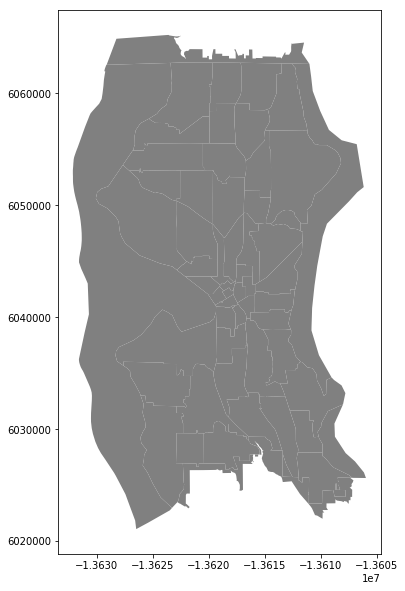

In [390]:
police_shp_gdf3.plot(figsize=(20,10),color='0.5')

In [391]:
from pandas.stats.api import ols

In [395]:
result = sm.ols(formula="OFFICER_RACE ~ FORCE_EFFECTIVE ", data=police_arrest_df2).fit()

NameError: name 'ols' is not defined

In [425]:
ds=pd.read_csv('/Users/apple/Downloads/data-science-for-good/Dept_37-00027/37-00027_ACS_data/37-00027_ACS_education-attainment-over-25/ACS_16_5YR_B15003_with_ann.csv')

In [427]:
ds.head()

,GEO.id,GEO.id2,GEO.display-label,HD01_VD01,HD02_VD01,HD01_VD02,HD02_VD02,HD01_VD03,HD02_VD03,HD01_VD04,...,HD01_VD21,HD02_VD21,HD01_VD22,HD02_VD22,HD01_VD23,HD02_VD23,HD01_VD24,HD02_VD24,HD01_VD25,HD02_VD25
0,Id,Id2,Geography,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - No schooling completed,Margin of Error; Total: - No schooling completed,Estimate; Total: - Nursery school,Margin of Error; Total: - Nursery school,Estimate; Total: - Kindergarten,...,Estimate; Total: - Associate's degree,Margin of Error; Total: - Associate's degree,Estimate; Total: - Bachelor's degree,Margin of Error; Total: - Bachelor's degree,Estimate; Total: - Master's degree,Margin of Error; Total: - Master's degree,Estimate; Total: - Professional school degree,Margin of Error; Total: - Professional school ...,Estimate; Total: - Doctorate degree,Margin of Error; Total: - Doctorate degree
1,1400000US48453000101,48453000101,"Census Tract 1.01, Travis County, Texas",3166,228,0,13,0,13,0,...,82,56,1232,173,834,183,227,80,154,69
2,1400000US48453000102,48453000102,"Census Tract 1.02, Travis County, Texas",1897,166,0,13,0,13,0,...,16,20,814,125,389,93,180,83,170,70
3,1400000US48453000203,48453000203,"Census Tract 2.03, Travis County, Texas",854,155,0,13,0,13,0,...,15,20,364,100,167,66,38,28,54,33
4,1400000US48453000204,48453000204,"Census Tract 2.04, Travis County, Texas",2153,197,11,17,0,13,0,...,60,47,914,168,442,108,96,44,175,68


In [428]:
ds1=pd.read_csv('/Users/apple/Downloads/data-science-for-good/Dept_37-00027/37-00027_ACS_data/37-00027_ACS_owner-occupied-housing/ACS_16_5YR_S2502_with_ann.csv')

In [429]:
ds1.head()

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,HC03_MOE_VC01,HC01_EST_VC04,...,HC02_EST_VC35,HC02_MOE_VC35,HC03_EST_VC35,HC03_MOE_VC35,HC01_EST_VC36,HC01_MOE_VC36,HC02_EST_VC36,HC02_MOE_VC36,HC03_EST_VC36,HC03_MOE_VC36
0,Id,Id2,Geography,Occupied housing units; Estimate; Occupied hou...,Occupied housing units; Margin of Error; Occup...,Owner-occupied housing units; Estimate; Occupi...,Owner-occupied housing units; Margin of Error;...,Renter-occupied housing units; Estimate; Occup...,Renter-occupied housing units; Margin of Error...,Occupied housing units; Estimate; RACE AND HIS...,...,Owner-occupied housing units; Estimate; YEAR H...,Owner-occupied housing units; Margin of Error;...,Renter-occupied housing units; Estimate; YEAR ...,Renter-occupied housing units; Margin of Error...,Occupied housing units; Estimate; YEAR HOUSEHO...,Occupied housing units; Margin of Error; YEAR ...,Owner-occupied housing units; Estimate; YEAR H...,Owner-occupied housing units; Margin of Error;...,Renter-occupied housing units; Estimate; YEAR ...,Renter-occupied housing units; Margin of Error...
1,1400000US48453000101,48453000101,"Census Tract 1.01, Travis County, Texas",1997,111,1176,120,821,118,92.2,...,10.0,5.1,0.0,4.5,5.7,2.5,8.9,4.1,1.1,1.7
2,1400000US48453000102,48453000102,"Census Tract 1.02, Travis County, Texas",1108,69,1043,78,65,40,95.1,...,9.0,4.6,0.0,39.5,16.3,4.2,17.4,4.6,0.0,39.5
3,1400000US48453000203,48453000203,"Census Tract 2.03, Travis County, Texas",710,60,0,13,710,60,78.3,...,-,**,0.0,5.1,0.0,5.1,-,**,0.0,5.1
4,1400000US48453000204,48453000204,"Census Tract 2.04, Travis County, Texas",1629,86,686,104,943,119,89.1,...,7.9,6.7,1.0,1.6,2.8,1.9,5.1,4.2,1.1,1.5
